In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier  

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [4]:
data =pd.read_csv('data.csv')
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [5]:
data.shape

(92000, 1025)

In [6]:
data.groupby("character").count()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
character,,,,,,,,,,,,,,,,,,,,,
character_01_ka,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_02_kha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_03_ga,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_04_gha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_05_kna,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_06_cha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_07_chha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_08_ja,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_09_jha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


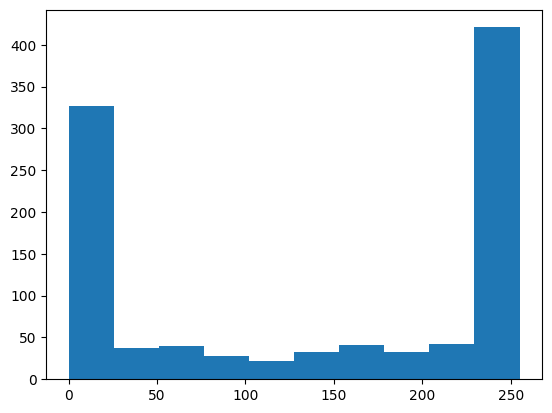

In [7]:
#Pixel Distribution
plt.hist(data.iloc[0,:-1])
plt.show()

In [8]:
#splitting the Data
X=data.iloc[:,:-1]/255
y=data.iloc[:,-1].values

In [9]:
y

array(['character_01_ka', 'character_01_ka', 'character_01_ka', ...,
       'digit_9', 'digit_9', 'digit_9'], dtype=object)

In [10]:
char_names=data.character.unique()
char_names

array(['character_01_ka', 'character_02_kha', 'character_03_ga',
       'character_04_gha', 'character_05_kna', 'character_06_cha',
       'character_07_chha', 'character_08_ja', 'character_09_jha',
       'character_10_yna', 'character_11_taamatar', 'character_12_thaa',
       'character_13_daa', 'character_14_dhaa', 'character_15_adna',
       'character_16_tabala', 'character_17_tha', 'character_18_da',
       'character_19_dha', 'character_20_na', 'character_21_pa',
       'character_22_pha', 'character_23_ba', 'character_24_bha',
       'character_25_ma', 'character_26_yaw', 'character_27_ra',
       'character_28_la', 'character_29_waw', 'character_30_motosaw',
       'character_31_petchiryakha', 'character_32_patalosaw',
       'character_33_ha', 'character_34_chhya', 'character_35_tra',
       'character_36_gya', 'digit_0', 'digit_1', 'digit_2', 'digit_3',
       'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9'],
      dtype=object)

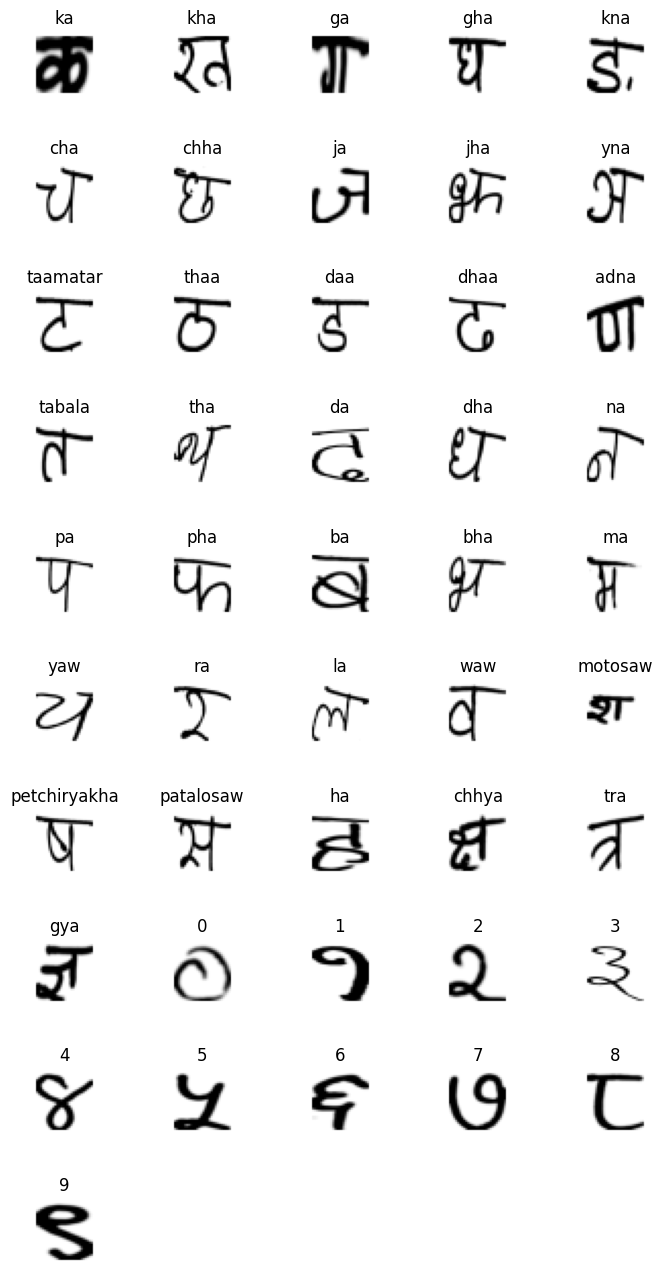

In [11]:
# Visualizing the Charater

rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])

            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()

In [12]:
#Splitting Data in to train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64400, 1024)
(64400,)
(27600, 1024)
(27600,)


In [14]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [15]:
y_train

array([38, 34,  1, ..., 38,  0,  7])

In [16]:
print(X_train.shape)
print(X_test.shape)

(64400, 1024)
(27600, 1024)


In [17]:
# Random Forest
RF= RandomForestClassifier(n_estimators= 100, criterion="entropy")  
RF.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy')

In [18]:
#Predicting the test set result  
y_pred= RF.predict(X_test) 

In [19]:
from sklearn import metrics  
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9061231884057971


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

Confusion Matrix: [[563   0   0 ...   0   0   0]
 [  0 520   0 ...   0   0   1]
 [  1   7 505 ...   0   0   0]
 ...
 [  0   0   0 ... 586   0   0]
 [  0   0   0 ...   0 575   0]
 [  0   0   0 ...   1   0 560]]


In [21]:
# performance evaluatio metrics

from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       588
           1       0.88      0.90      0.89       578
           2       0.89      0.91      0.90       553
           3       0.83      0.85      0.84       589
           4       0.87      0.94      0.90       575
           5       0.94      0.89      0.92       634
           6       0.81      0.89      0.85       516
           7       0.92      0.94      0.93       590
           8       0.93      0.98      0.95       566
           9       0.91      0.92      0.92       562
          10       0.93      0.93      0.93       625
          11       0.95      0.88      0.91       614
          12       0.88      0.91      0.89       588
          13       0.95      0.90      0.92       598
          14       0.92      0.90      0.91       616
          15       0.96      0.91      0.94       623
          16       0.80      0.86      0.83       600
          17       0.84    

In [22]:
#CNN

In [23]:
img_height_rows = 32
img_width_cols = 32

In [24]:
print(X_train.shape)
print(y_train.shape)

(64400, 1024)
(64400,)


In [25]:
im_shape = (img_height_rows, img_width_cols, 1)
X_train = X_train.values.reshape(X_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
X_test = X_test.values.reshape(X_test.shape[0], *im_shape)

In [26]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='Same'))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='Same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=46,activation='softmax'))

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [29]:
history=model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
2013/2013 [==============================] - 115s 55ms/step - loss: 0.7151 - accuracy: 0.7939 - val_loss: 0.2510 - val_accuracy: 0.9250
Epoch 2/10
2013/2013 [==============================] - 128s 64ms/step - loss: 0.2179 - accuracy: 0.9330 - val_loss: 0.1709 - val_accuracy: 0.9501
Epoch 3/10
2013/2013 [==============================] - 107s 53ms/step - loss: 0.1471 - accuracy: 0.9538 - val_loss: 0.1251 - val_accuracy: 0.9634
Epoch 4/10
2013/2013 [==============================] - 116s 58ms/step - loss: 0.1136 - accuracy: 0.9638 - val_loss: 0.1301 - val_accuracy: 0.9627
Epoch 5/10
2013/2013 [==============================] - 111s 55ms/step - loss: 0.0921 - accuracy: 0.9703 - val_loss: 0.1101 - val_accuracy: 0.9679
Epoch 6/10
2013/2013 [==============================] - 112s 56ms/step - loss: 0.0799 - accuracy: 0.9738 - val_loss: 0.1119 - val_accuracy: 0.9672
Epoch 7/10
2013/2013 [==============================] - 108s 54ms/step - loss: 0.0663 - accuracy: 0.9779 - val_loss: 0

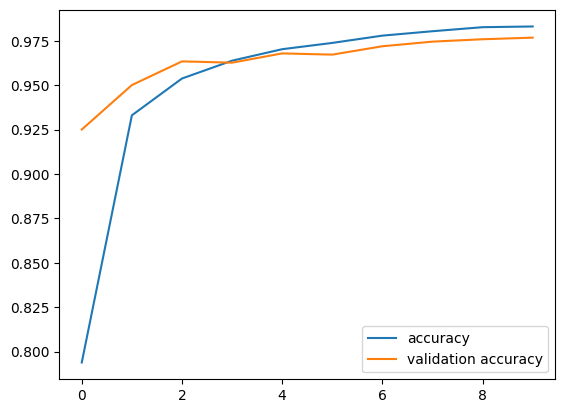

In [30]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend(loc='best')
plt.show()

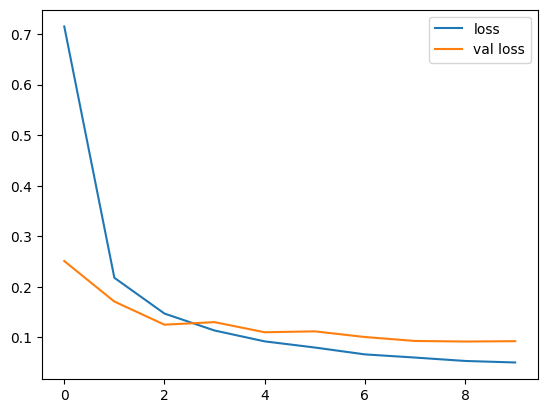

In [31]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend(loc='best')
plt.show()

In [32]:
# Evaluating confusion matrix
res = tf.math.confusion_matrix(y_test, y_pred)
# Printing the result
print('Confusion_matrix: ',res)

Confusion_matrix:  tf.Tensor(
[[563   0   0 ...   0   0   0]
 [  0 520   0 ...   0   0   1]
 [  1   7 505 ...   0   0   0]
 ...
 [  0   0   0 ... 586   0   0]
 [  0   0   0 ...   0 575   0]
 [  0   0   0 ...   1   0 560]], shape=(46, 46), dtype=int32)
